# Model Evaluation 

If you cannot measure it, you cannot improve it

## Bias-Variance Tradeoff

- **When we fit models, we have two main sources of errors**
  - **Bias** – how far are the predicted from the actual values
  - **Variance** – variability of prediction for a certain data point

- **Illustration – shooter aimed at a bullseye target**
  - High bias – the aim is shifted away from the center
  - High variance – the points are more "spread out"

| Bias-Variance  | Optimal model complexity |
| ------------- | ------------- |
| 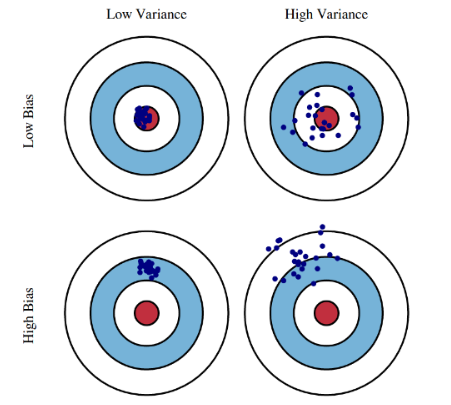   | 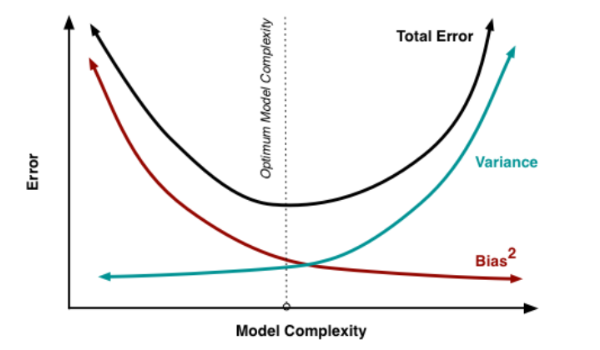 |


- **When we fit several models, they perform differently**
  - Some are not complex enough (don't describe data well enough)
    - **Underfitting** (high bias)
  - Some may describe the data "too well" and **fail to generalize** when **new** data points are introduced
    - **Overfitting** (high variance)

- **Optimal model: tradeoff between underfitting and overfitting**
  - Usually, underfitting is easy to spot
    - Poor performance w.r.t. some metric
  - Overfitting is more complicated
    - Many methods exist to prevent overfitting

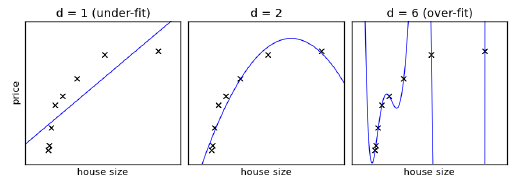

## Confusion Matrix:

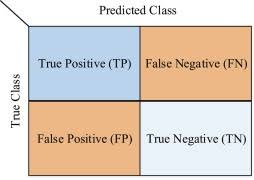

## Accuracy - how many of the retrieved results are correct?

$$\frac{TP + TN}{TP + TN + FP + FN}$$


## Precision and Recall
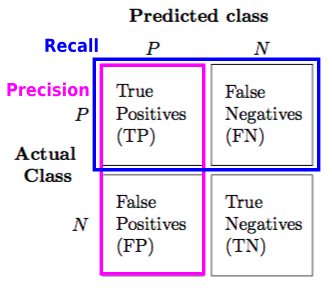

Precision : How many of the retrieved results were useful? <br>
$$ Precision = \frac{TP}{TP + FP} $$
Recall : Were there any useful pages left not retrieved?  <br>
$$Recall = \frac{TP}{TP + FN}$$


- Which of the metrics is more important? - Usually depends on the business requirements.
- We can also __combine Precision and Recall__, using their harmonic mean! 

## F1 score
$$ F_{\beta} = \frac{(\beta^{2}+1)PR}{\beta^{2}P+R} $$

Most common F1:
$$ F_{1} = \frac{2PR}{P+R} $$




----
## Cross Validation with cross_val_score

----
| train val test split | cross validation |
| ------------- | ------------- |
| 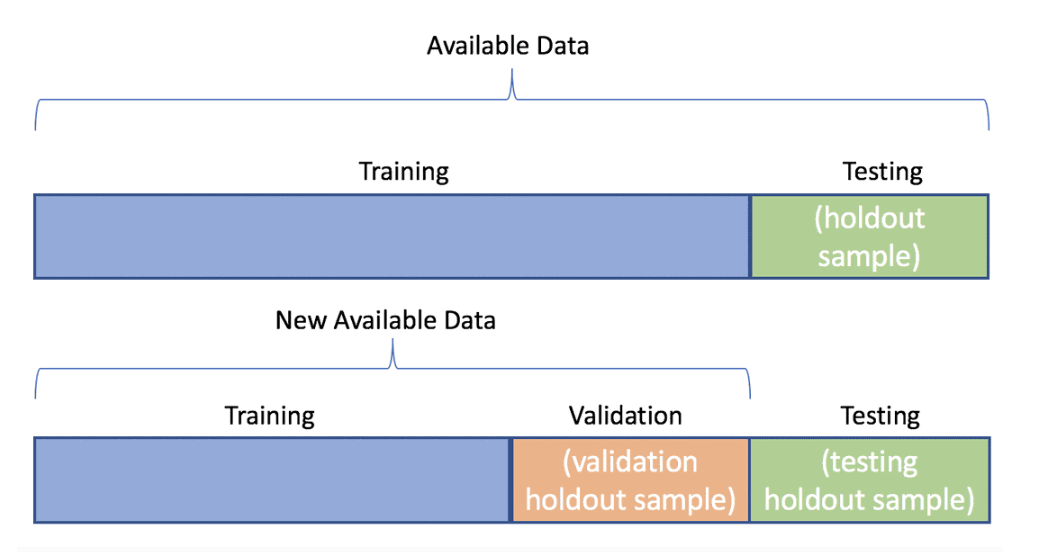 | 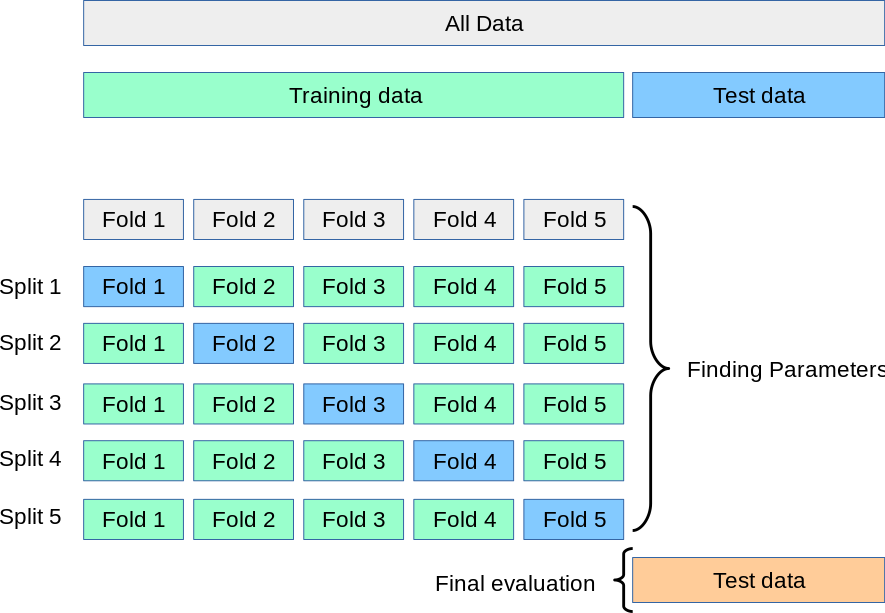 |

----

## How to navigate your efforts depending on the metrics?
- Use the selected metric to improve the performance on the validation set.
- Once tuned, estimate the performance on the test set, too. 
- The train, validation and test scores w.r.t the selected metric should help you to estimate bias/variance.
- Then, it would be easier to decide whether to get more data/make more complex/simple model.

# Online metrics - see how users interact with your system

- Session abandonment rate and session success rate
- Click-through rate (CTR) 
- Satisfaction of a click - how much time is spent on a URL
- Time before clicking

Available Datasets for Experiments with evaluation metrics:
(only for classification) <br>
https://www.nltk.org/book/ch02.html <br>
https://archive.ics.uci.edu/ml/datasets.html

### Eager Learning

1. **Definition**: Eager learning involves building a general model from the training data before making any predictions. This model is then used to make predictions on new, unseen data.

2. **Model Building**: The learning process includes a model-building phase, where a hypothesis or decision boundary is generated, based on the entire training dataset.

3. **Examples**: Algorithms like decision trees, neural networks, support vector machines, and linear regression are typical eager learners. These algorithms involve a preprocessing step where the model parameters are established upfront.

4. **Prediction Speed**: Generally, eager learners have fast prediction times because the model has already been precomputed during the training phase. This means they only need to apply this model to new data.

5. **Adaptation to New Data**: Since the model is pre-constructed, updating the model in response to new data can be computationally expensive and may require retraining.

6. **Complexity**: Usually, eager learning methods can be computationally expensive upfront due to the model-building phase but are efficient during prediction.

### Instance-Based Learning

1. **Definition**: Instance-based learning, often referred to as lazy learning, involves storing the training data and deferring the processing until a prediction is requested. The model is essentially the dataset itself.

2. **Model Building**: There's no explicit model-building phase; instead, the algorithm uses the stored data to determine the prediction at the time of a query.

3. **Examples**: The k-nearest neighbors (k-NN) algorithm is a classic example of an instance-based learning method. It makes predictions based on the closest examples in the training dataset.

4. **Prediction Speed**: Predictions can be slower for instance-based learners because they need to search through a potentially large dataset at the time of each prediction.

5. **Adaptation to New Data**: Instance-based learners can adapt to new data more easily and quickly since no model structure needs reconstruction; you only need to add new instances to the dataset.

6. **Complexity**: Instance-based methods can be less demanding during the training phase but computationally intensive during prediction, due to the need to process potentially large datasets on the fly.

### In Summary

- **Eager Learning** involves training a model beforehand, which makes it faster at prediction time but potentially less flexible with new data without retraining.
- **Instance-Based Learning** defers processing until prediction time, allowing easy updates with new data but possibly incurring higher computation costs during prediction.

# KNN -  K Nearest Neighbors - Classification

To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level


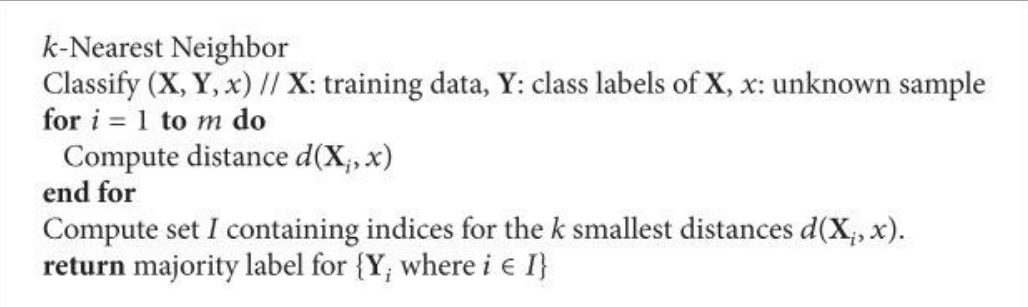

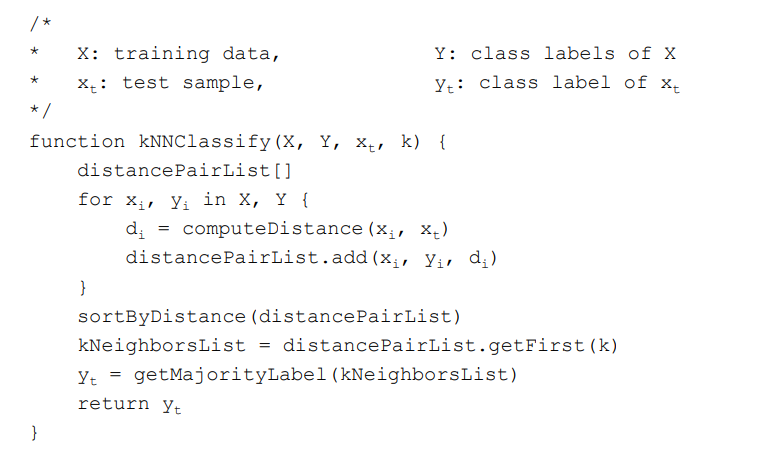

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

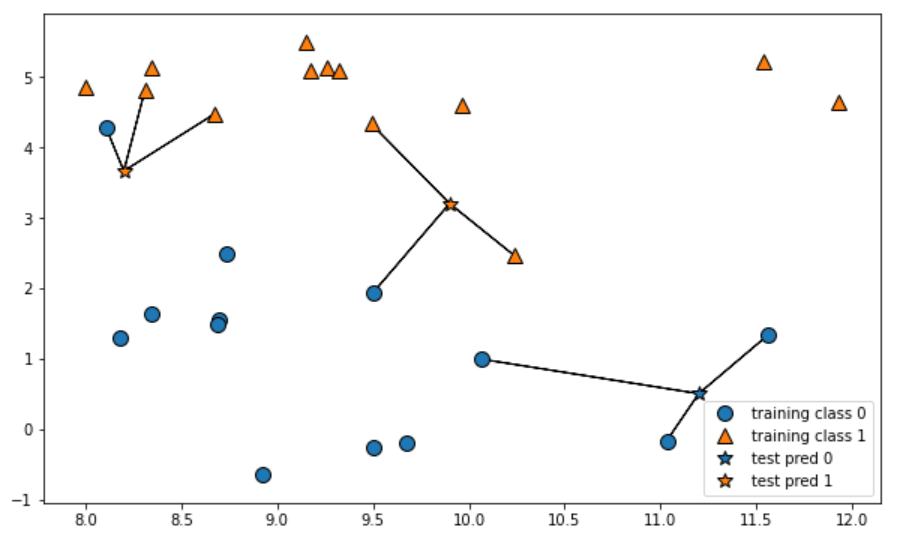

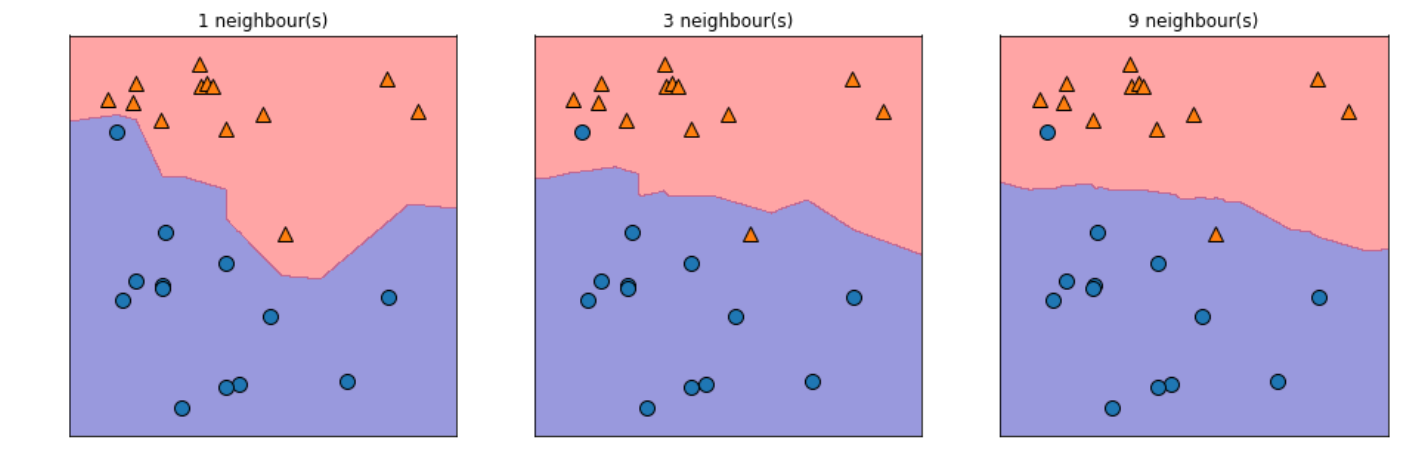

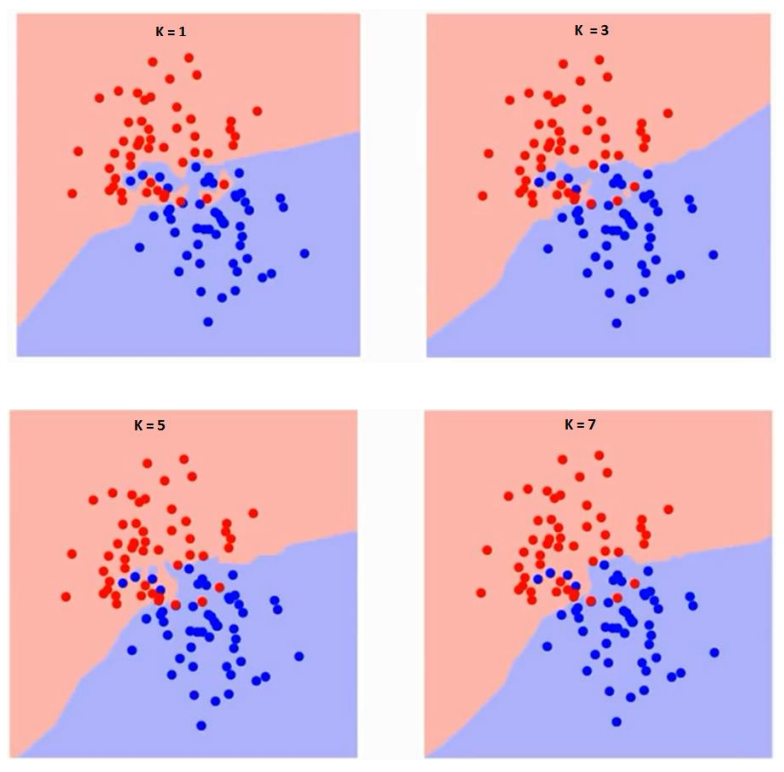

# Minkowski Distance Metrics

Minkowski distance is a metric used to measure the distance between two points in a normed vector space. It is a generalization of both the Euclidean and Manhattan distances.


The Minkowski distance between two points $ \mathbf{x} = (x_1, x_2, \ldots, x_n) $ and $ \mathbf{y} = (y_1, y_2, \ldots, y_n) $ is defined as:

$
D(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$

where:
- $ n $ is the number of dimensions.
- $ p $ is a parameter that determines the type of distance.

## Special Cases

1. **Manhattan Distance (Taxicab or L1 Norm)**
   - When $ p = 1 $, the Minkowski distance becomes the Manhattan distance.
   - Formula: 
     $
     D(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|
     $

2. **Euclidean Distance (L2 Norm)**
   - When $ p = 2 $, the Minkowski distance becomes the Euclidean distance.
   - Formula:
     $
     D(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
     $

3. **Chebyshev Distance (L∞ Norm)**
   - When $ p \to \infty $, the Minkowski distance becomes the Chebyshev distance.
   - Formula:
     $
     D(\mathbf{x}, \mathbf{y}) = \max_{i} |x_i - y_i|
     $

In [2]:
import numpy as np
from scipy.spatial.distance import minkowski

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def chebyshev_distance(x, y):
    return np.max(np.abs(x - y))

def minkowski_distance(x, y, p):
    return np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(f"Manhattan distance (p=1): {manhattan_distance(x, y)}")
print(f"Euclidean distance (p=2): {euclidean_distance(x, y)}")
print(f"Minkowski distance (p=3): {minkowski_distance(x, y, 3)}")
print(f"Chebyshev distance (p=∞): {chebyshev_distance(x, y)}")

Manhattan distance (p=1): 9
Euclidean distance (p=2): 5.196152422706632
Minkowski distance (p=3): 4.3267487109222245
Chebyshev distance (p=∞): 3


## Properties and Characteristics

1. **Geometric Interpretation**

    - Manhattan (p=1): Sum of absolute differences along each dimension
    - Euclidean (p=2): "As the crow flies" straight-line distance
    - Chebyshev (p=∞): Maximum difference along any dimension

2. **Unit Circle Visualization**
   - Different values of p result in different shapes of unit circle

The Minkowski distance can also be viewed as a multiple of the power mean of the component-wise differences between 
P and Q.

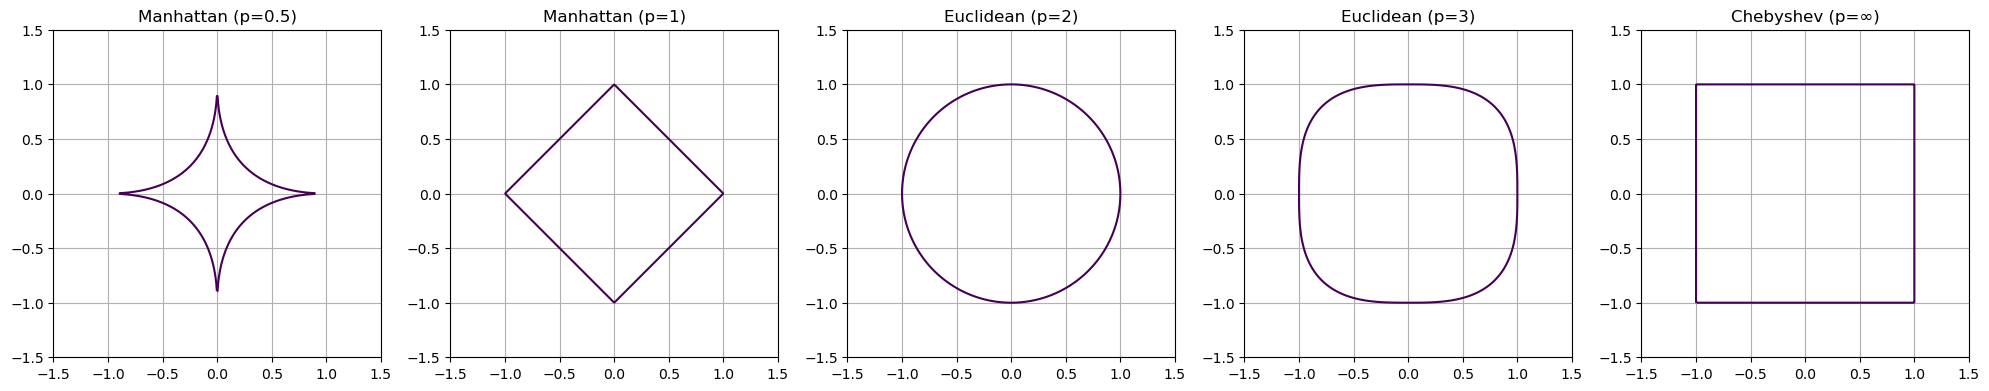

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_unit_circles():
    x = np.linspace(-1.5, 1.5, 500)
    y = np.linspace(-1.5, 1.5, 500)
    X, Y = np.meshgrid(x, y)
    
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    
    p_values = [0.5, 1, 2, 3, np.inf]
    titles = ['Manhattan (p=0.5)', 'Manhattan (p=1)', 'Euclidean (p=2)', 'Euclidean (p=3)', 'Chebyshev (p=∞)']
    
    for i, (p, title) in enumerate(zip(p_values, titles)):
        if p != np.inf:
            Z = np.power(np.abs(X)**p + np.abs(Y)**p, 1/p)
        else:
            Z = np.maximum(np.abs(X), np.abs(Y))
        
        axs[i].contour(X, Y, Z, levels=[1])
        axs[i].set_title(title)
        axs[i].set_aspect('equal')
        axs[i].grid(True)
        
    plt.tight_layout()
    plt.show()

plot_unit_circles()

## Data

In [4]:
df = pd.read_csv("Data/gene_expression.csv")

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


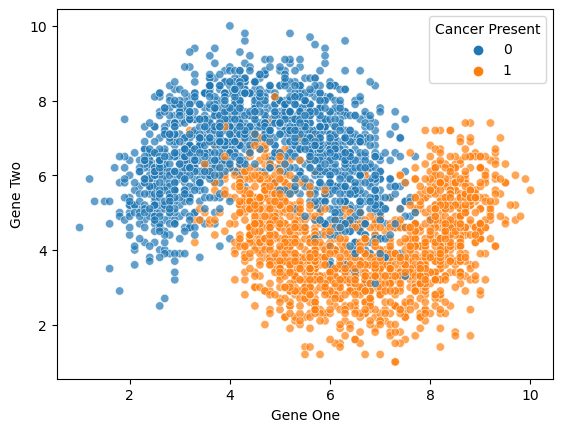

In [6]:
sns.scatterplot(x="Gene One", y="Gene Two", hue="Cancer Present", data=df, alpha=0.7)
plt.show()

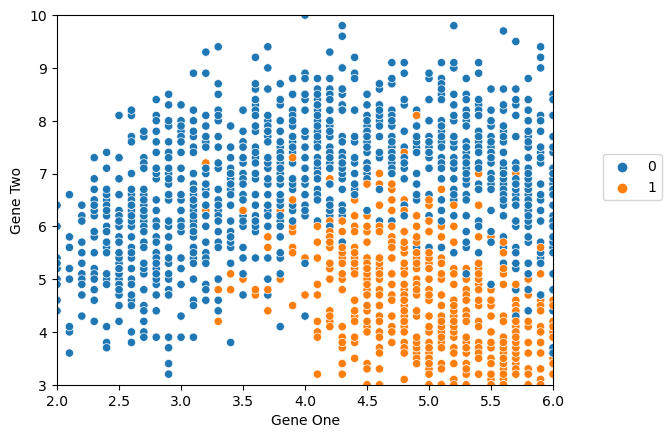

In [7]:
sns.scatterplot(x="Gene One", y="Gene Two", hue="Cancer Present", data=df)
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc=(1.1, 0.5))

## Train Test Split and Scaling Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Cancer Present", axis=1)
y = df["Cancer Present"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
train_pred = knn_model.predict(scaled_X_train)

In [17]:
print(accuracy_score(train_pred, y_train))

0.9771428571428571


# Understanding KNN and Choosing K Value

In [18]:
full_test = pd.concat([X_test, y_test], axis=1)

In [19]:
len(full_test)

900

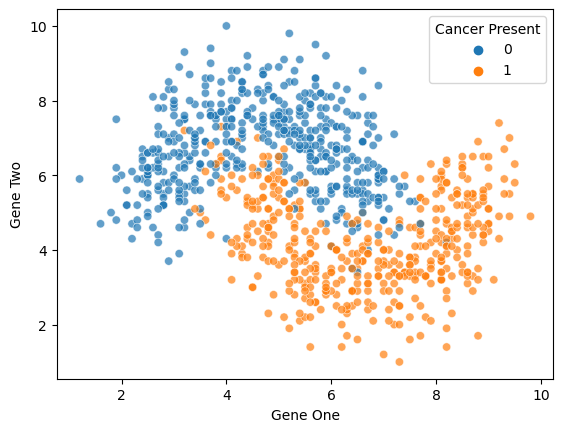

In [20]:
sns.scatterplot(
    x="Gene One", y="Gene Two", hue="Cancer Present", data=full_test, alpha=0.7
)
plt.show()

## Model Evaluation

In [21]:
y_pred = knn_model.predict(scaled_X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [24]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [26]:
test_error_rates = []


for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

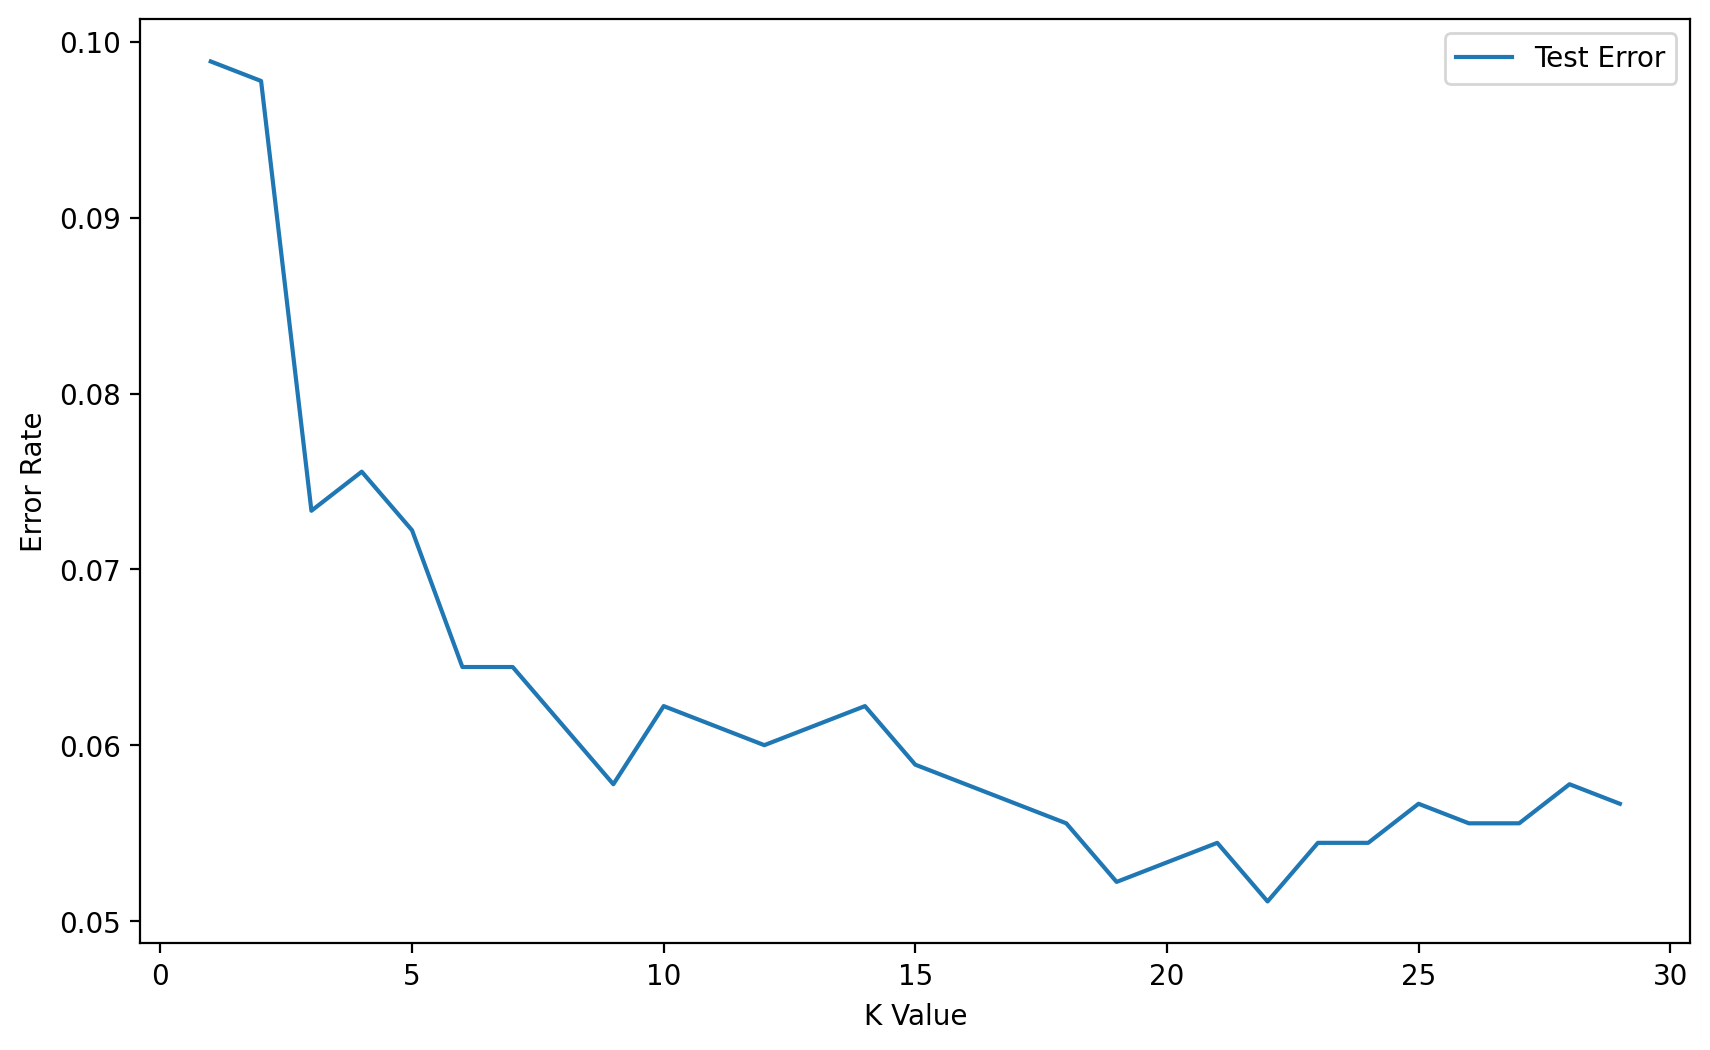

In [27]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, 30), test_error_rates, label="Test Error")
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.show()

## Full Cross Validation Grid Search for K Value

### Creating a Pipeline to find K value

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [28]:
scaler = StandardScaler()

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [31]:
# Highly recommend string code matches variable name!
operations = [("scaler", scaler), ("knn", knn)]

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipe = Pipeline(operations)

In [34]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [35]:
k_values = list(range(1, 20))

In [36]:
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [37]:
param_grid = {"knn__n_neighbors": k_values}

In [38]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [39]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [40]:
print(full_cv_classifier.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=16))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=16), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 16, 'knn__p': 2, 'knn__weights': 'uniform'}


In [41]:
print(full_cv_classifier.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [42]:
print(full_cv_classifier.cv_results_['mean_fit_time'])

[0.00339947 0.00259838 0.00199075 0.00199952 0.00221272 0.00240126
 0.00200372 0.00220699 0.00180573 0.00198731 0.00218506 0.00200524
 0.00199981 0.00239301 0.00239334 0.00260177 0.00220523 0.00261254
 0.00220947]


Let's check our understanding:
**How many total runs did we do?**

In [43]:
len(k_values)

19

In [44]:
print(full_cv_classifier.cv_results_["mean_test_score"])

[0.90380952 0.90714286 0.92142857 0.91380952 0.92380952 0.92047619
 0.92761905 0.9252381  0.9247619  0.92285714 0.9252381  0.92428571
 0.92761905 0.92809524 0.92857143 0.93       0.92904762 0.92857143
 0.92761905]


In [45]:
len(full_cv_classifier.cv_results_["mean_test_score"])

19

## Final Model

We just saw that our  GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [59]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=16)
operations = [("scaler", scaler), ("knn14", knn14)]

In [60]:
pipe = Pipeline(operations)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=16))])

In [62]:
pipe_pred = pipe.predict(X_test)

In [63]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [64]:
single_sample = X_test.iloc[40]

In [65]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [72]:
print(pipe.predict(single_sample.values.reshape(1, -1)))

[0]


c:\Users\MSI\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
print(pipe.predict_proba(single_sample.values.reshape(1, -1)))

[[0.9375 0.0625]]


c:\Users\MSI\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Curse of Dimensionality

- **As the dimensionality of data (number of attributes used) increases, a fixed-size training set starts to cover a smaller and smaller portion of the space of possible examples.**  
  For example: With $100$ binary attributes, a training set of $1,000,000,000$ examples occupies only a $10^{-18}$ portion of the space of possible examples.

- **Noise from irrelevant attributes**  
  For example, $100$ binary attributes; true class is $x_1$ and $x_2$. Algorithm KNN: With $98$ irrelevant attributes $x_3...x_{100}$, the noise completely drowns out the relevant signal. Result — random predictions!

- **Many equally similar examples**  
  Suppose examples are evenly distributed in a spatial grid. $X_t$ — test example. If dimensionality of examples is $d$, then $x_t$ has $2d$ nearest neighbors. For $d = 100$, $x_t$ has $200$ nearest neighbors! Result — random predictions!

- **Nearest neighbors are not really close!**  
  Suppose the entire space is an n-dimensional hypercube with side $1$, containing N points; the k-neighborhood is the smallest hypercube containing $k$ points (nearest neighbors to $x_t$). Let $l$ be the average side of the k-neighborhood. Its volume is $l^n$. Thus, $l^n = k/N$ or $l = (k/N)^{(1/n)}$  
  Let $k = 10$, $N = 1,000,000$. For $n = 2$, $l ≈ 0.003 = 0.3\%$. For $n = 3$, $l = 3\%$, for $n = 100$, $l = 94\%!$  
  **For $\mathbf{n = 200}$, about $\mathbf{98\%}$ of all points lie in a shell near the surface of the unit hypercube with a thickness of $\mathbf{1\%}$ of the side of the hypercube!**

Even if we have only binary attributes the space of possible samples grow exponentially 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

def generate_data(samples, dims):
    class_1_data = np.random.normal(0, 1, (samples, dims))
    class_2_data = np.random.normal(3, 1, (samples, dims))
    data = np.concatenate([class_1_data, class_2_data], axis=0)

    data = (data - data.mean(axis=0)) / data.std(axis=0)

    return data, cdist(data, data, metric='euclidean').flatten()

In [70]:
samples = 20

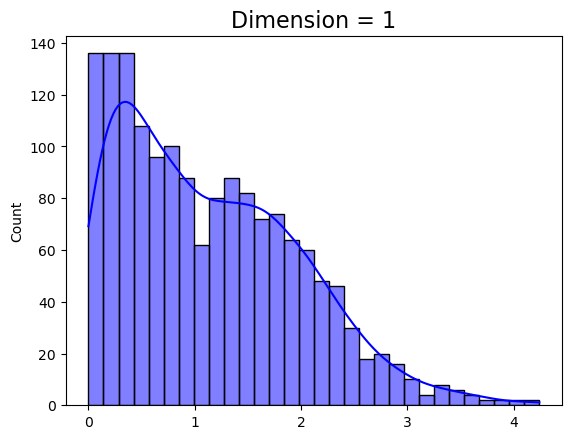

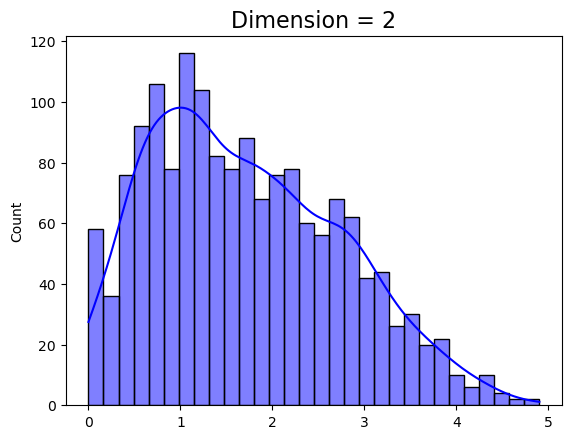

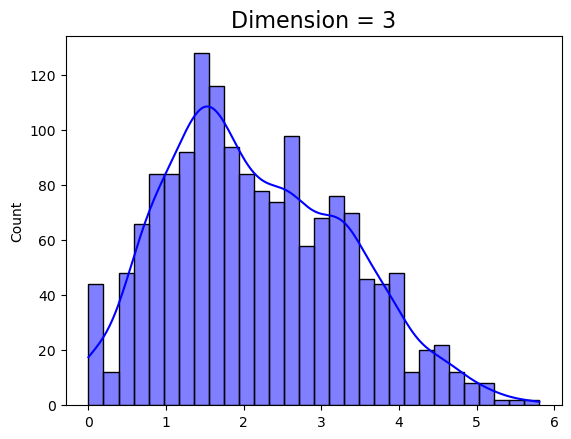

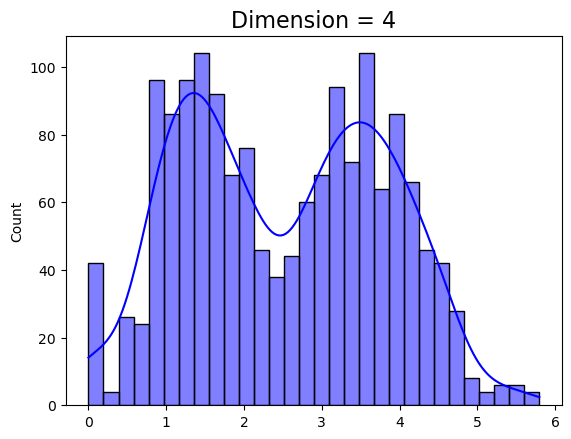

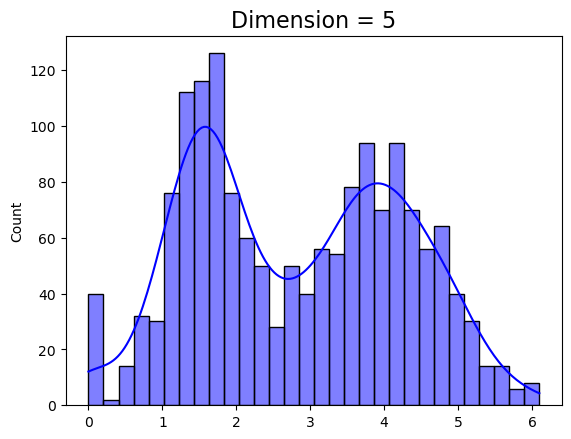

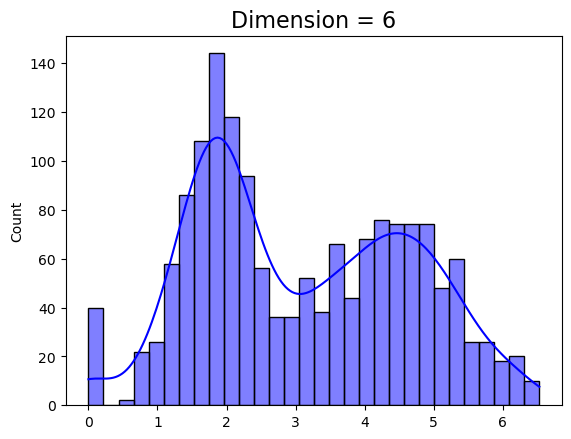

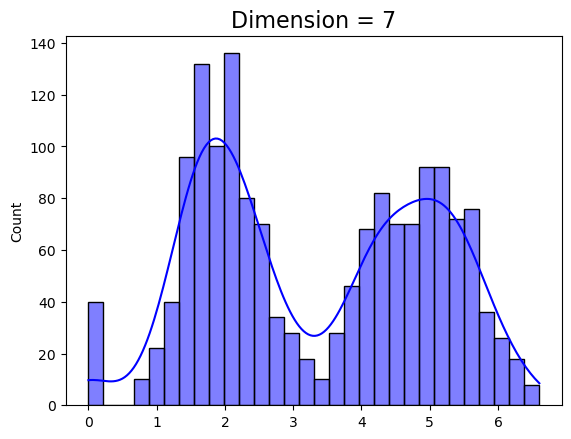

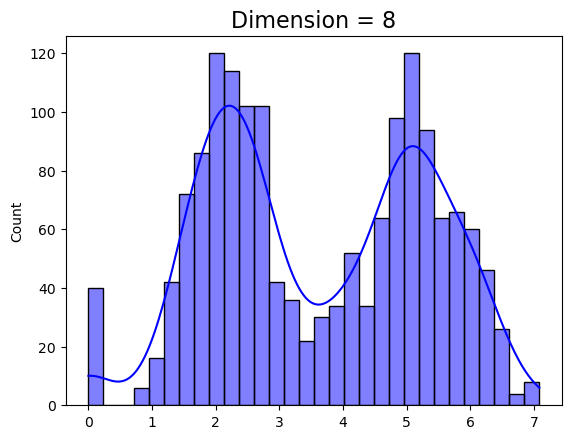

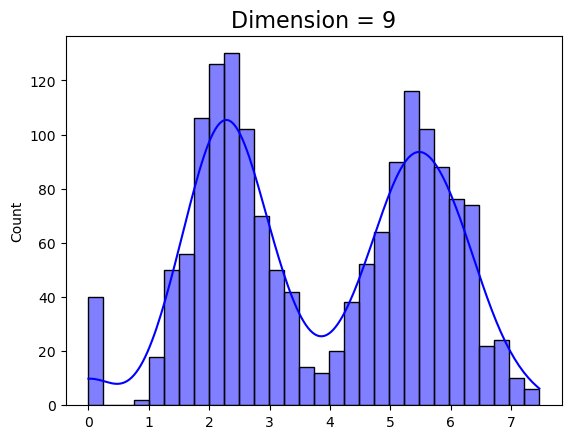

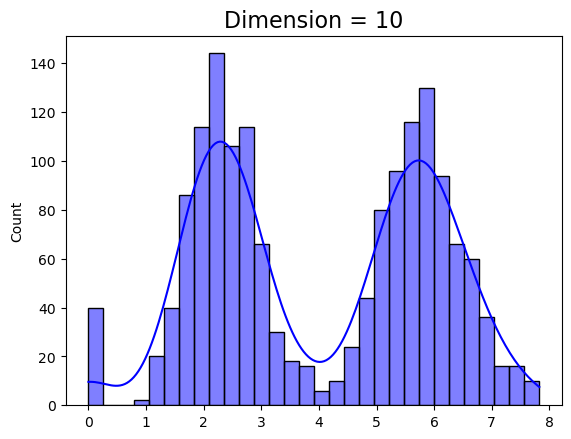

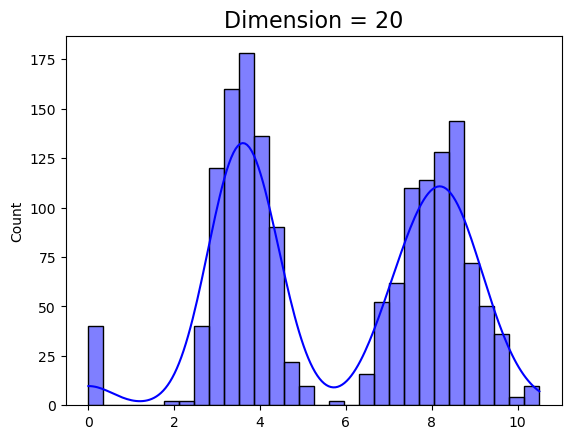

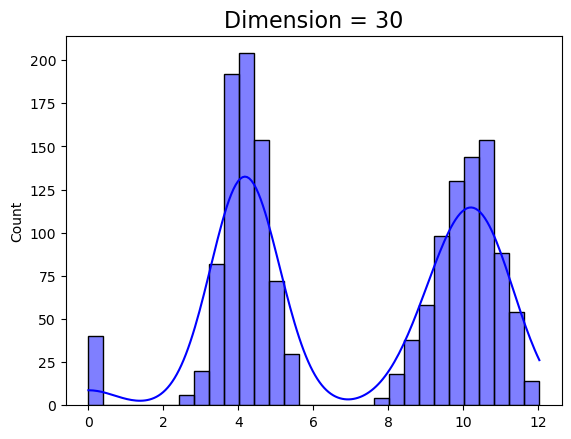

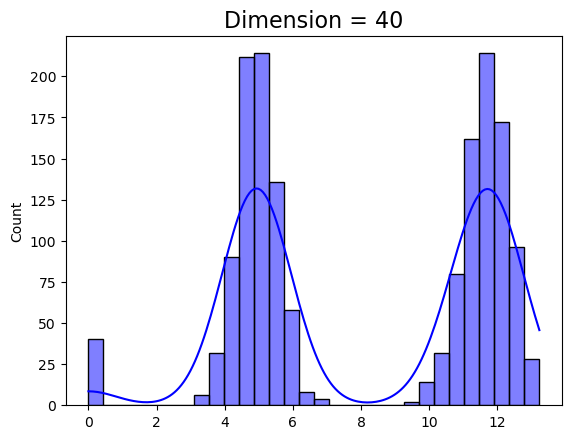

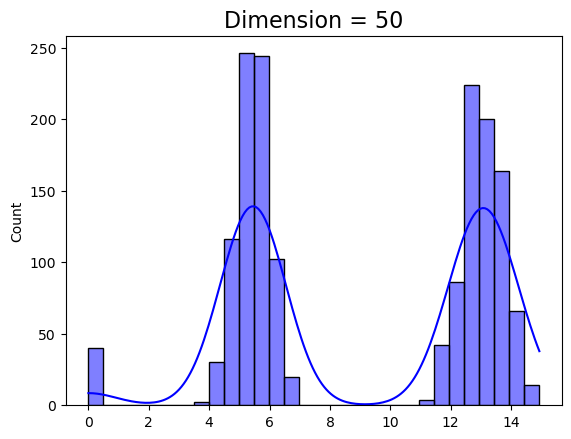

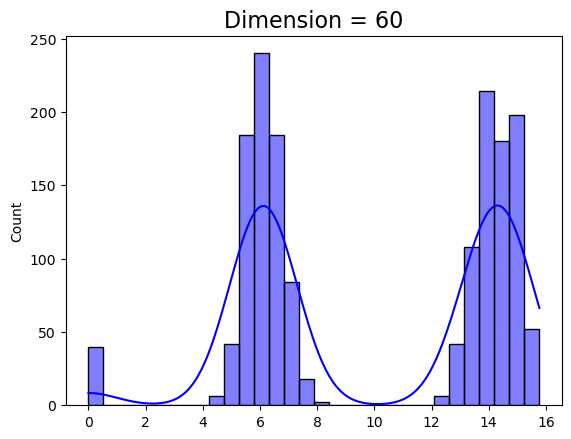

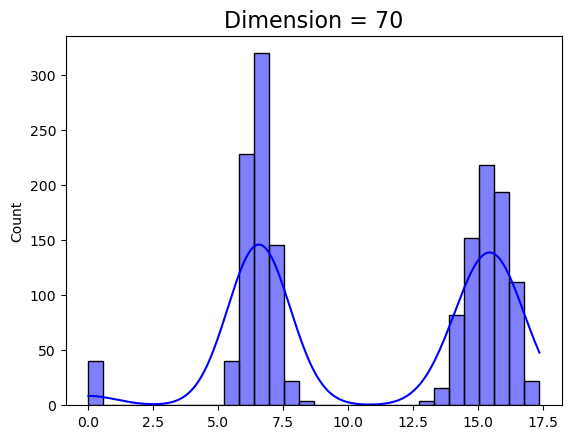

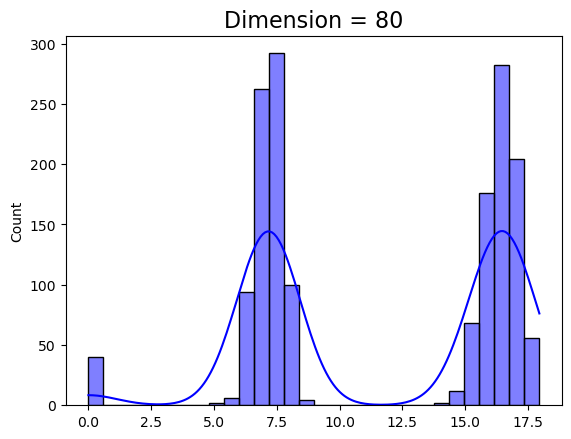

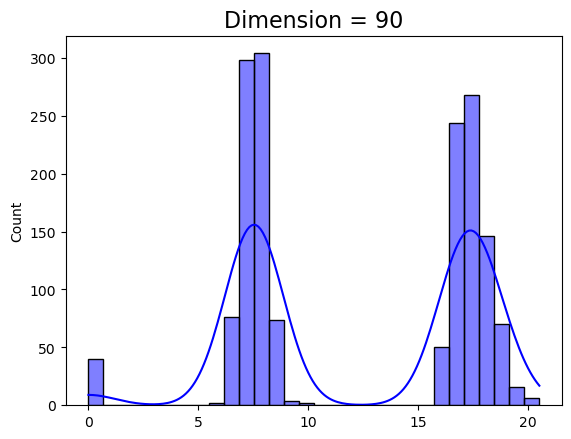

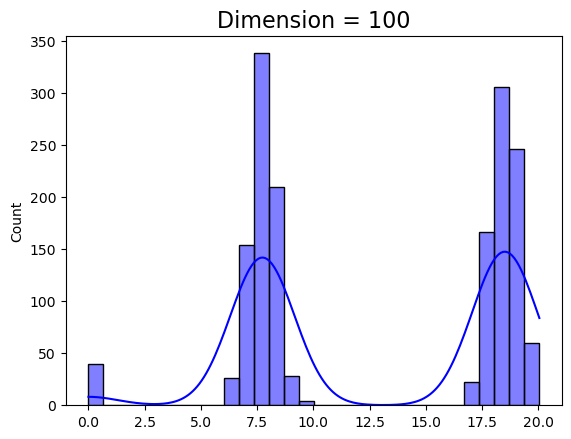

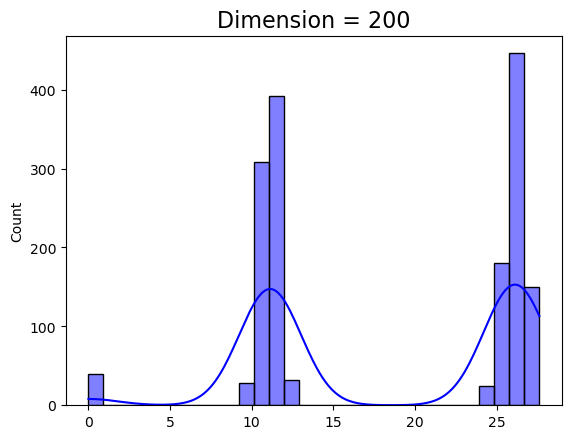

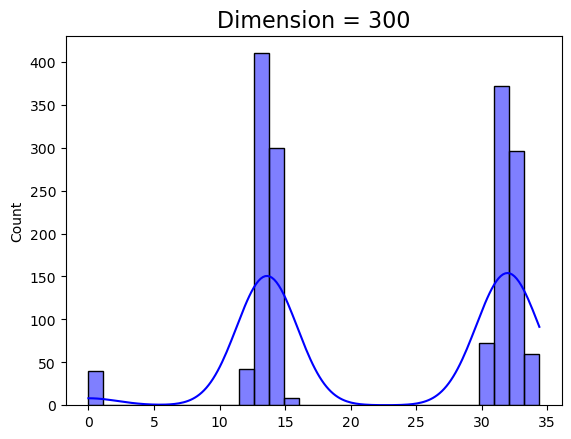

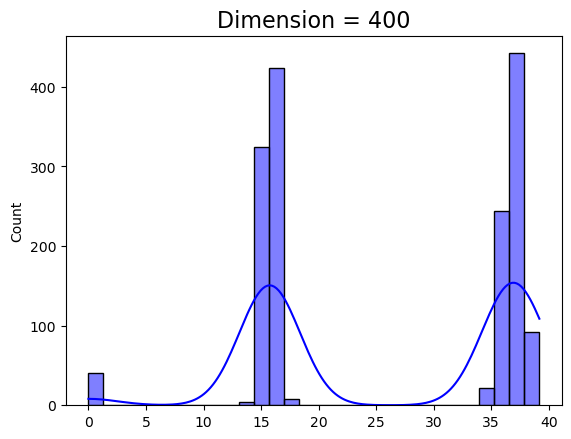

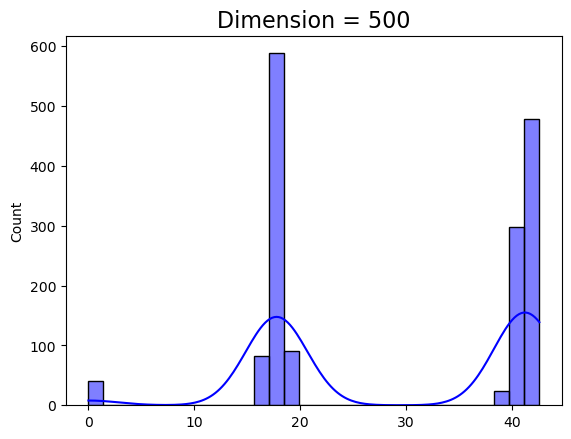

In [71]:
for dim in list(range(1, 10)) + list(range(10, 110, 10)) + [100 * i for i in range(2, 6)]:
    _, distances = generate_data(samples, dim)
    sns.histplot(distances, bins=30, kde=True, color='b')
    plt.title('Dimension = %s' % dim, fontsize=16)
    plt.show()